In [20]:
import glob
from astropy.io import fits
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [21]:
paths = glob.glob('./xsm/data/*/*/*/calibrated/*.lc' )
paths

['./xsm/data\\2022\\01\\07\\calibrated\\ch2_xsm_20220107_v1_level2.lc',
 './xsm/data\\2022\\01\\08\\calibrated\\ch2_xsm_20220108_v1_level2.lc',
 './xsm/data\\2022\\01\\09\\calibrated\\ch2_xsm_20220109_v1_level2.lc',
 './xsm/data\\2022\\02\\07\\calibrated\\ch2_xsm_20220207_v1_level2.lc',
 './xsm/data\\2022\\02\\16\\calibrated\\ch2_xsm_20220216_v1_level2.lc',
 './xsm/data\\2022\\02\\17\\calibrated\\ch2_xsm_20220217_v1_level2.lc',
 './xsm/data\\2022\\02\\19\\calibrated\\ch2_xsm_20220219_v1_level2.lc',
 './xsm/data\\2022\\02\\20\\calibrated\\ch2_xsm_20220220_v1_level2.lc',
 './xsm/data\\2022\\02\\21\\calibrated\\ch2_xsm_20220221_v1_level2.lc',
 './xsm/data\\2022\\02\\22\\calibrated\\ch2_xsm_20220222_v1_level2.lc',
 './xsm/data\\2022\\02\\23\\calibrated\\ch2_xsm_20220223_v1_level2.lc',
 './xsm/data\\2022\\02\\24\\calibrated\\ch2_xsm_20220224_v1_level2.lc',
 './xsm/data\\2022\\02\\25\\calibrated\\ch2_xsm_20220225_v1_level2.lc',
 './xsm/data\\2022\\02\\26\\calibrated\\ch2_xsm_20220226_v1_leve

In [22]:
hdul = fits.open('./xsm/data\\2022\\01\\07\\calibrated\\ch2_xsm_20220107_v1_level2.lc')
hdul.info()    # tring to read a single data entry

Filename: ./xsm/data\2022\01\07\calibrated\ch2_xsm_20220107_v1_level2.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   ()      
  1  RATE          1 BinTableHDU     64   5092R x 4C   [D, E, E, E]   


In [23]:
data = hdul[1].data
print(data)             # trying to read the data in BINTABLE for 1 date

[(1.58289598e+08,  910.49677, 30.174438, 1.)
 (1.58289599e+08,  903.95764, 30.065887, 1.)
 (1.58289600e+08,  940.05664, 30.660343, 1.) ...
 (1.58368126e+08, 1558.9254 , 39.48323 , 1.)
 (1.58368127e+08, 1531.8538 , 39.138905, 1.)
 (1.58368128e+08, 1620.5536 , 40.2561  , 1.)]


In [24]:
for row in paths:
   print(row)        # Checking the rows in paths

./xsm/data\2022\01\07\calibrated\ch2_xsm_20220107_v1_level2.lc
./xsm/data\2022\01\08\calibrated\ch2_xsm_20220108_v1_level2.lc
./xsm/data\2022\01\09\calibrated\ch2_xsm_20220109_v1_level2.lc
./xsm/data\2022\02\07\calibrated\ch2_xsm_20220207_v1_level2.lc
./xsm/data\2022\02\16\calibrated\ch2_xsm_20220216_v1_level2.lc
./xsm/data\2022\02\17\calibrated\ch2_xsm_20220217_v1_level2.lc
./xsm/data\2022\02\19\calibrated\ch2_xsm_20220219_v1_level2.lc
./xsm/data\2022\02\20\calibrated\ch2_xsm_20220220_v1_level2.lc
./xsm/data\2022\02\21\calibrated\ch2_xsm_20220221_v1_level2.lc
./xsm/data\2022\02\22\calibrated\ch2_xsm_20220222_v1_level2.lc
./xsm/data\2022\02\23\calibrated\ch2_xsm_20220223_v1_level2.lc
./xsm/data\2022\02\24\calibrated\ch2_xsm_20220224_v1_level2.lc
./xsm/data\2022\02\25\calibrated\ch2_xsm_20220225_v1_level2.lc
./xsm/data\2022\02\26\calibrated\ch2_xsm_20220226_v1_level2.lc
./xsm/data\2022\02\27\calibrated\ch2_xsm_20220227_v1_level2.lc
./xsm/data\2022\02\28\calibrated\ch2_xsm_20220228_v1_le

In [25]:
sequence = np.arange(0,19,1)
sequence

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

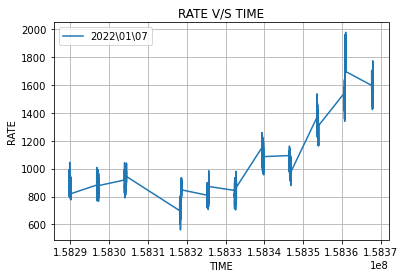

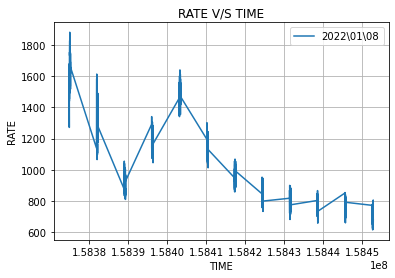

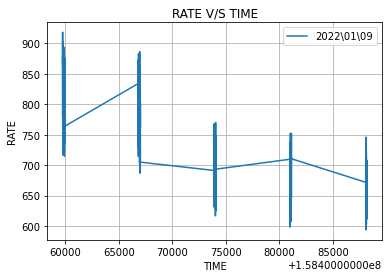

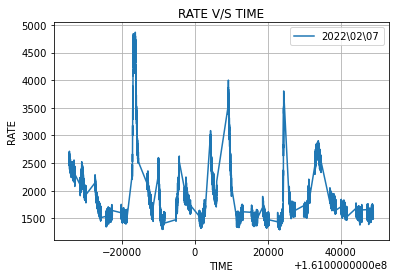

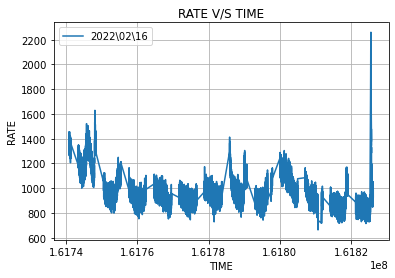

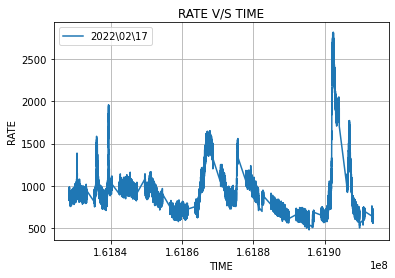

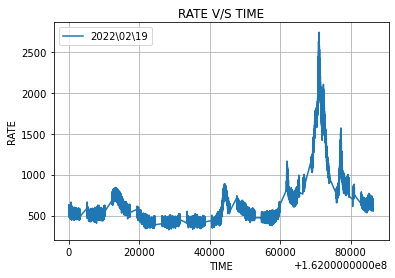

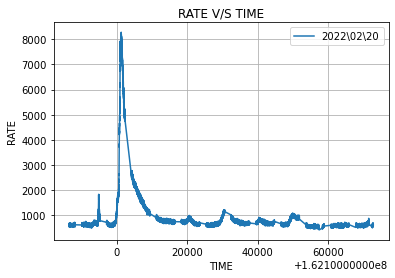

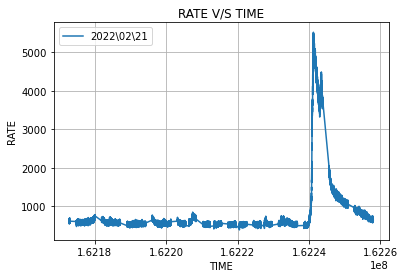

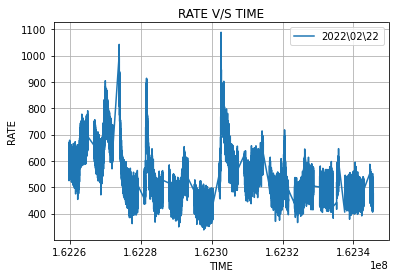

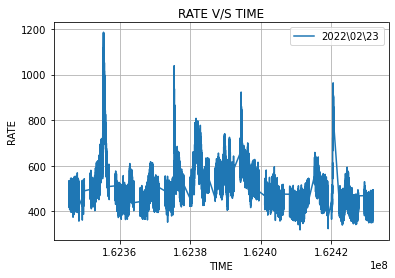

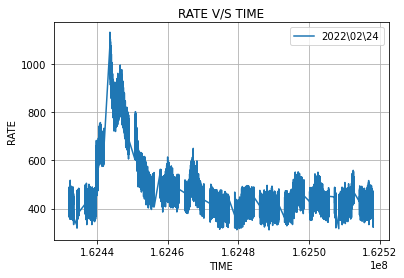

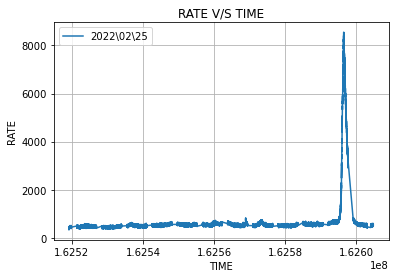

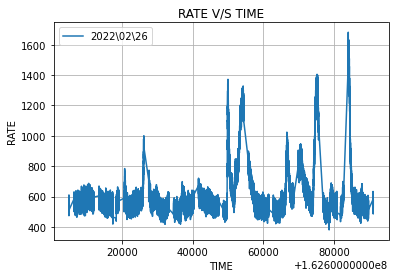

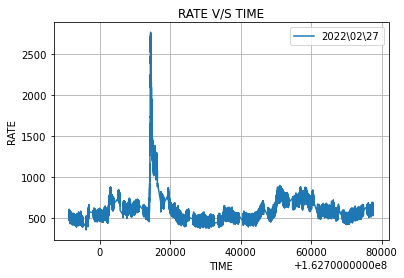

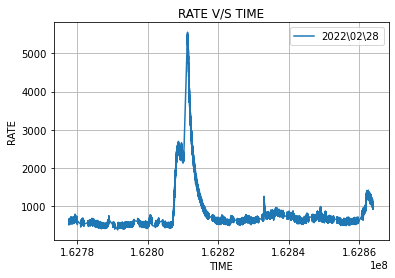

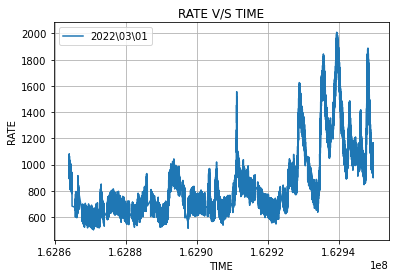

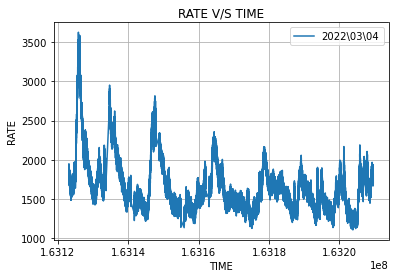

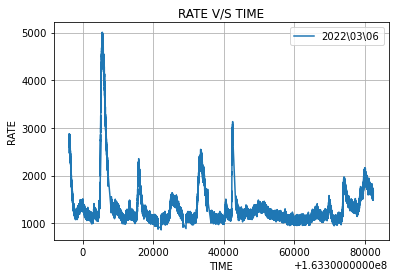

In [26]:
for item in sequence:
    data_entry = fits.open(paths[item])
    data_final = data_entry[1].data
    df_final = pd.DataFrame(data_final)
    time = df_final['TIME']
    rate = df_final['RATE']
    plt.plot(time, rate, label=paths[item][11:21])
    plt.grid(True)
    plt.title('RATE V/S TIME')
    plt.xlabel('TIME')
    plt.ylabel('RATE')
    plt.legend()
    plt.show()

In [27]:
filter_data_raw = fits.open('./xsm/data\\2022\\01\\07\\calibrated\\ch2_xsm_20220107_v1_level2.lc')
filter_data = filter_data_raw[1].data
df = pd.DataFrame(filter_data)
rates_array = np.array(df['RATE'], dtype='int64')
indices = np.where(rates_array[:]<1500)
microflares_data = rates_array[indices]
microflares_data.size           # trying to count the no. of microflares in a single day

4397

In [28]:
date_list = []
micro_count_list = np.zeros(19)
peak_count_list = np.zeros(19)

for item in sequence:
    filter_data_basic = fits.open(paths[item])
    filter_data = filter_data_basic[1].data
    df = pd.DataFrame(filter_data)
    rates_array = np.array(df['RATE'], dtype='int64')
    micro_indices = np.where((rates_array[:]<1500) & (rates_array[:]>1000))
    micro_data = rates_array[micro_indices]       
    peak_indices = np.where(rates_array[:]>=1500)
    peak_data = rates_array[peak_indices]
    
    micro_count = micro_data.size
    peak_count = peak_data.size
    date_of_obs = paths[item][11:21]
    
    date_list.append(date_of_obs)
    micro_count_list[item] = micro_count
    peak_count_list[item] = peak_count
    
df_final_last = pd.DataFrame(columns = ['Date of Observation', 'No. of microflares', 'No. of peaks'])
df_final_last['Date of Observation'] = date_list
df_final_last['No. of microflares'] = micro_count_list
df_final_last['No. of peaks'] = peak_count_list

print(df_final_last)

   Date of Observation  No. of microflares  No. of peaks
0           2022\01\07              1256.0         695.0
1           2022\01\08              1417.0         434.0
2           2022\01\09                 0.0           0.0
3           2022\02\07              5601.0       33168.0
4           2022\02\16             16420.0         280.0
5           2022\02\17             10997.0        3567.0
6           2022\02\19              2856.0        3105.0
7           2022\02\20              3121.0        5429.0
8           2022\02\21              4694.0        3806.0
9           2022\02\22                42.0           0.0
10          2022\02\23               255.0           0.0
11          2022\02\24               228.0           0.0
12          2022\02\25               163.0        2096.0
13          2022\02\26              2971.0         249.0
14          2022\02\27              1590.0         562.0
15          2022\02\28              3963.0        5425.0
16          2022\03\01         

In [ ]:
df_final_last.to_csv('No. of microflares and peaks per day of observation.csv',index=False)